## Task B

### Load the image

I_2d.shape:  (2048, 1536)


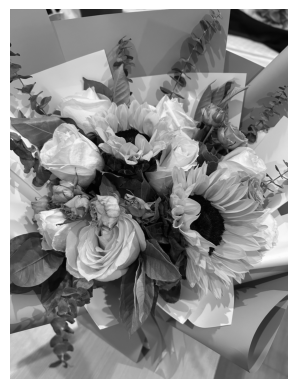

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np  
import os

figures_dir = image_path = os.path.join("..", "figures")

image_path = os.path.join(figures_dir, "example.jpg")
I = Image.open(image_path).convert('L')  # 'L' means the gray scale

I_2d = np.array(I)
print("I_2d.shape: ", I_2d.shape)

plt.imshow(I_2d, cmap='gray')  # show the image
plt.axis('off')     # turn down the axis
plt.savefig(os.path.join(figures_dir, "example_luminance.jpg"),             
            bbox_inches='tight',  # 紧贴内容裁剪
            pad_inches=0,         # 去掉额外留白
            )
plt.show()


### Function definition

In [3]:
def get_kernel(L, v):
    M = np.zeros((2*L,2*L)) - v # off matrix

    inner = np.ones((L, L))    # on matrix
    start = L // 2
    end = start + L

    M[start:end, start:end] = inner # add the on matrix
    return M

def norm_matrix(M):
    '''Normalize the matrix to [-1, 1]'''
    M_min = np.min(M)
    M_max = np.max(M)
    return 2 * (M - M_min) / (M_max - M_min) - 1

### 1.1 Compute the kernel

M.shape:  (20, 20)


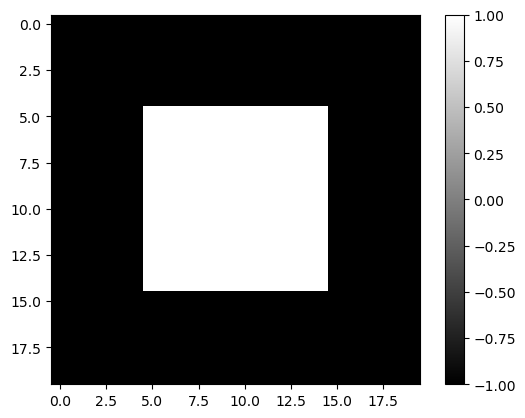

In [7]:
L, v = 10, 1        # for practice
M = get_kernel(L, v)   

print("M.shape: ", M.shape)

plt.imshow(M, cmap='gray')  # show the matrix
plt.colorbar()


### 1.2 Response of a single neuron (of a single region)

Ganglion response at (2000, 1500): -20605.0


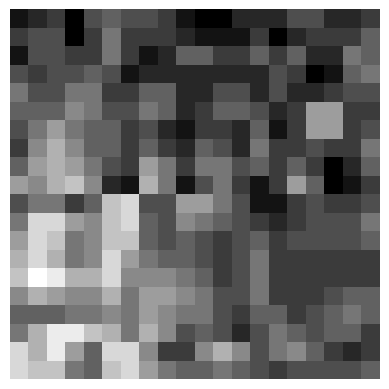

In [8]:
# pick a region of the image 
center_X, center_Y = 2000, 1500   # center location of the image for this neuron

x_vals = np.arange(center_X - (L-1) - 1, center_X + L)  # MATLAB 1-index -> Python 0-index
y_vals = np.arange(center_Y - (L-1) - 1, center_Y + L)


image_region_for_this_neuron = I_2d[np.ix_(x_vals, y_vals)]

# compute the response
M_response = image_region_for_this_neuron * M
Response = np.sum(M_response)
print(f"Ganglion response at ({center_X}, {center_Y}): {Response}")

# show the image region
plt.imshow(image_region_for_this_neuron, cmap='gray', origin='lower')
plt.axis('off')     # turn down the axis
plt.show()

### 1.3 Compute the responses of the whole picture

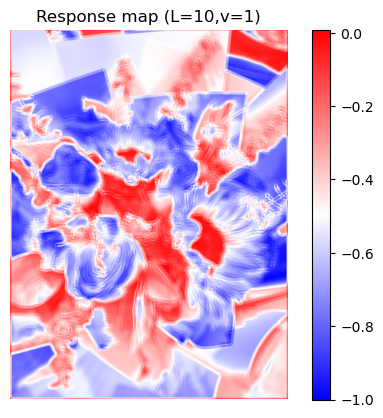

In [ ]:
from scipy.signal import convolve2d

Response_map = convolve2d(I_2d, M, mode='same')

# Normolized for plot
Response_map_normolized = Response_map / np.max(np.abs(Response_map))

plt.imshow(Response_map_normolized, cmap='bwr')
plt.axis("off")
plt.colorbar()
plt.title(f"Response map (L={L},v={v})")

<Figure size 640x480 with 0 Axes>

### 1.4 Different $L$ and $v$

In [5]:
L_list = [10, 50, 100]
v_list = [1, 5, 10]

# 先计算所有 Response_map，以便统一颜色范围
response_maps = []
for L in L_list:
    for v in v_list:
        M = get_kernel(L, v)
        R = convolve2d(I_2d, M, mode='same')
        R_norm = norm_matrix(R)  # 标准化到 [-1,1]
        response_maps.append(R_norm)
        print(f"Computed response map for L={L}, v={v}")

Computed response map for L=10, v=1
Computed response map for L=10, v=5
Computed response map for L=10, v=10
Computed response map for L=50, v=1
Computed response map for L=50, v=5
Computed response map for L=50, v=10
Computed response map for L=100, v=1
Computed response map for L=100, v=5
Computed response map for L=100, v=10


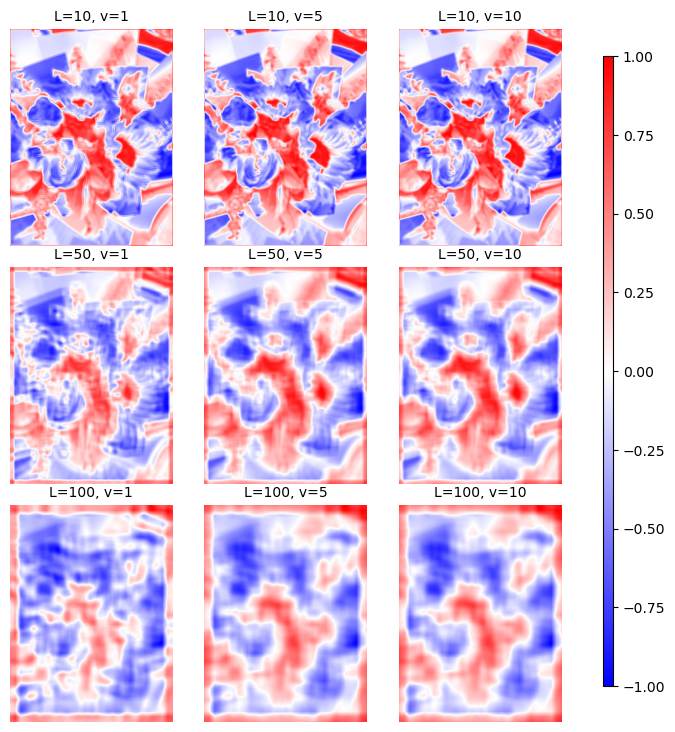

In [39]:
from matplotlib import gridspec
vmin = min(r.min() for r in response_maps)
vmax = max(r.max() for r in response_maps)

# 使用 gridspec 留出右侧空间
fig = plt.figure(figsize=(10,9))
gs = gridspec.GridSpec(3, 3, figure=fig, wspace=-0.6, hspace=0.1, right=1)  # right<1 为 colorbar 留出空间

# 绘制子图
axes = []
for idx in range(9):
    ax = fig.add_subplot(gs[idx // 3, idx % 3])
    im = ax.imshow(response_maps[idx], cmap='bwr', vmin=vmin, vmax=vmax)
    ax.axis("off")
    L = L_list[idx // 3]
    v = v_list[idx % 3]
    ax.set_title(f"L={L}, v={v}", fontsize=10)
    axes.append(ax)

# 在右侧添加 colorbar
cax = fig.add_axes([0.88, 0.15, 0.01, 0.7])  # [左, 下, 宽, 高] 绝对比例
fig.colorbar(im, cax=cax)

plt.savefig(os.path.join(figures_dir, "response_map_L_v.pdf"),            
            bbox_inches='tight',  # 紧贴内容裁剪
            pad_inches=0.1,         # 去掉额外留白
            )
plt.show()